In [4]:
import phylopandas as ph
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# new_seq = ph.read_fasta('data/GISAID/newfile.fasta') #original dataset covid-19
new_seq = ph.read_fasta('data/GISAID/sequences.fasta') #covid-19 data (600 sequences) as of 3/17/20
new_seq = new_seq.drop(columns = ['label','uid','description']) #dropping redundant attributes 
new_metadata = pd.read_csv('data/GISAID/metadata.tsv', sep = '\t')
# (These  datasets were downloaded from GISAID https://www.gisaid.org and #https://github.com/nextstrain/ncov, respectively.


old_seq = ph.read_fasta('old_data/Coronaviridae_old.fasta') #other coronaviruses
old_info = pd.read_csv('old_data/Coronaviridae_old_information_table.txt', sep = '\t')
# (These two datasets were downloaded from Virus-Host DB https://www.genome.jp/virushostdb/).

In [5]:
old_seq.head() #this is data from human/non-human family coronaviridae viruses.

,id,sequence,description,label,uid
0,AC_000192,tataagagtgattggcgtccgtacgtaccctctctactctaaaact...,AC_000192 Murine hepatitis virus strain JHM|Mu...,AC_000192,yySPYvN0jy
1,AF201929,ataagagtgattggcgtccgtacgtaccctttctactctcaaactc...,AF201929 Murine hepatitis virus strain 2|Mus m...,AF201929,MDQtPemTnO
2,AY278488,ccaggaaaagccaaccaacctcgatctcttgtagatctgttctcta...,AY278488 SARS coronavirus BJ01|Catarrhini|Viru...,AY278488,JNjtdgzJ3R
3,AY278491,atattaggtttttacctacccaggaaaagccaaccaacctcgatct...,AY278491 SARS coronavirus HKU-39849|Mammalia|V...,AY278491,W3oJc7vxjA
4,AY278554,ctacccaggaaaagccaaccaacctcgatctcttgtagatctgttc...,AY278554 SARS coronavirus CUHK-W1|Homo sapiens...,AY278554,w5W7cRLiak


In [3]:
old_info.head()

,Accession ID,Virus name,Host,Virus lineage
0,AC_000192,Murine hepatitis virus strain JHM,Mus musculus,Viruses; Riboviria; Nidovirales; Cornidovirine...
1,AF201929,Murine hepatitis virus strain 2,Mus musculus,Viruses; Riboviria; Nidovirales; Cornidovirine...
2,AY278488,SARS coronavirus BJ01,Catarrhini,Viruses; Riboviria; Nidovirales; Cornidovirine...
3,AY278491,SARS coronavirus HKU-39849,Mammalia,Viruses; Riboviria; Nidovirales; Cornidovirine...
4,AY278554,SARS coronavirus CUHK-W1,Homo sapiens,Viruses; Riboviria; Nidovirales; Cornidovirine...


In [5]:
new_seq.head() #IDs aligned with metadata, as shown below.

,id,sequence
0,hCoV-19/Wuhan/IVDC-HB-01/2019|EPI_ISL_402119,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
1,hCoV-19/Wuhan/IVDC-HB-04/2020|EPI_ISL_402120,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
2,hCoV-19/Wuhan/IVDC-HB-05/2019|EPI_ISL_402121,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
3,hCoV-19/Wuhan/IPBCAMS-WH-01/2019|EPI_ISL_402123,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
4,hCoV-19/Wuhan/WIV04/2019|EPI_ISL_402124,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...


In [6]:
new_metadata #https://github.com/nextstrain/ncov

,strain,virus,gisaid_epi_isl,genbank_accession,date,region,country,division,division_exposure,location,...,length,host,age,sex,originating_lab,submitting_lab,authors,url,title,date_submitted
0,Wuhan/IVDC-HB-01/2019,ncov,EPI_ISL_402119,?,12/30/19,Asia,China,Hubei,Hubei,Wuhan,...,29891,Human,49,Female,National Institute for Viral Disease Control a...,National Institute for Viral Disease Control a...,Tan et al,https://www.gisaid.org,?,1/10/20
1,Wuhan/IVDC-HB-04/2020,ncov,EPI_ISL_402120,?,1/1/20,Asia,China,Hubei,Hubei,Wuhan,...,29896,Human,61,Male,National Institute for Viral Disease Control a...,National Institute for Viral Disease Control a...,Tan et al,https://www.gisaid.org,?,1/11/20
2,Wuhan/IVDC-HB-05/2019,ncov,EPI_ISL_402121,?,12/30/19,Asia,China,Hubei,Hubei,Wuhan,...,29891,Human,32,Male,National Institute for Viral Disease Control a...,National Institute for Viral Disease Control a...,Tan et al,https://www.gisaid.org,?,1/10/20
3,Wuhan/IPBCAMS-WH-01/2019,ncov,EPI_ISL_402123,MT019529,12/24/19,Asia,China,Hubei,Hubei,Wuhan,...,29899,Human,65,Male,"Institute of Pathogen Biology, Chinese Academy...","Institute of Pathogen Biology, Chinese Academy...",Ren et al,https://www.gisaid.org,?,1/11/20
4,Wuhan/WIV04/2019,ncov,EPI_ISL_402124,MN996528,12/30/19,Asia,China,Hubei,Hubei,Wuhan,...,29891,Human,49,Female,Wuhan Jinyintan Hospital,"Wuhan Institute of Virology, Chinese Academy o...",Zhou et al,https://www.gisaid.org,?,1/11/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Belgium/VAG-03013/2020,ncov,EPI_ISL_415155,?,3/1/20,Europe,Belgium,Huldenberg,Huldenberg,?,...,29843,Human,14,Female,"KU Leuven, Clinical and Epidemiological Virology","KU Leuven, Clinical and Epidemiological Virology",Vanmechelen et al,https://www.gisaid.org,?,3/16/20
643,Belgium/SH-03014/2020,ncov,EPI_ISL_415156,?,3/1/20,Europe,Belgium,Huldenberg,Huldenberg,?,...,29843,Human,56,Male,"KU Leuven, Clinical and Epidemiological Virology","KU Leuven, Clinical and Epidemiological Virology",Vanmechelen et al,https://www.gisaid.org,?,3/16/20
644,Belgium/BC-03016/2020,ncov,EPI_ISL_415157,?,3/1/20,Europe,Belgium,Sint-Niklaas,Sint-Niklaas,?,...,29843,Human,46,Male,"KU Leuven, Clinical and Epidemiological Virology","KU Leuven, Clinical and Epidemiological Virology",Vanmechelen et al,https://www.gisaid.org,?,3/16/20
645,Belgium/QKJ-03015/2020,ncov,EPI_ISL_415158,?,3/1/20,Europe,Belgium,Brussels,Brussels,?,...,29843,Human,49,Male,"KU Leuven, Clinical and Epidemiological Virology","KU Leuven, Clinical and Epidemiological Virology",Vanmechelen et al,https://www.gisaid.org,?,3/16/20


In [7]:
# Part 1: Clustering viruses by family.

In [8]:
corona_df = pd.DataFrame(new_seq['sequence'])
corona_df['virus'] = 1 #1 for ncovid

other_df = pd.DataFrame(old_seq['sequence'])
other_df['virus'] = old_info['Virus lineage']

clust_df = pd.concat([corona_df,other_df])

clust_df #we will only need sequences to cluster these viruses.

,sequence,virus
0,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,1
1,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,1
2,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,1
3,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,1
4,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,1
...,...,...
203,atttaagtgaatagcttggctatctcacttcccctcgttctcttgc...,Viruses; Riboviria; Nidovirales; Cornidovirine...
204,acttttaaagtaaagtgagtgtagcgtggctatatctcttctttta...,Viruses; Riboviria; Nidovirales; Cornidovirine...
205,gattaaagagaatagcatagctatccctctctctccgttctcttgt...,Viruses; Riboviria; Nidovirales; Cornidovirine...
206,gactaaagataaaaattatagcattagtctataattttatctccct...,Viruses; Riboviria; Nidovirales; Cornidovirine...


In [9]:
#clustering step

In [1]:
#get all kmers
def get_Kmers_one_seq(seq, k):
    """gets all overlapping k-mers of a given sequence"""
    return [seq[x:x+k].lower() for x in range(len(seq) - k + 1)]

get_Kmers_one_seq('AATTC',2) #example

['aa', 'at', 'tt', 'tc']

In [2]:
#counting k-mers step
def get_Kmers_all_seqs(sequences, k):
    kmers = []
    for s in sequences:
        kmers.append(' '.join(get_Kmers_one_seq(s, k)))
    return kmers

get_Kmers_all_seqs(['aattccg','ttccaa'],3) #example

['aat att ttc tcc ccg', 'ttc tcc cca caa']

In [3]:
def get_kmers_df(df,k):
    seq_kmers = get_Kmers_all_seqs(df['sequence'],k) # k-mer "sentences" generated, one per sequence. Formatted as such to impute into sklearn count vectorizer.
    kmer_df = pd.DataFrame(seq_kmers)
    kmer_df.columns = ['kmers']
    return kmer_df

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

def get_kmer_counts(kmer_df,k):
    cv = CountVectorizer(ngram_range=(k,k)) #k,k
    kmer_counts = cv.fit_transform(kmer_df['kmers'].values.astype('U')) #impute k-mers
    return kmer_counts #returns a sparse matrix

#PCA step: reduce dimensionality of data.

def pca_kmer_counts(kmer_counts_mtx,n_components):
    X = kmer_counts_mtx.toarray()
    pca = PCA(n_components = n_components)
    pca.fit_transform(X)
    X_reduced = pca.fit_transform(X)
    return X_reduced

In [5]:
#clustering step
#now have 2 dimensional dataset apt for plotting.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans


def clust_preparation(clust_df,k): # adding to dataframe
    # clust_df['virus'][clust_df['virus'] != 1] = 0 #integer-labeling classs
    #get k-mers

    #get kmer counts for a    ll sequences.
    
    kmers_df = get_kmers_df(clust_df,k) #getting kmers
    all_seq_kmercounts = get_kmer_counts(kmers_df, k)   #each row is a feature vector of kmer counts
    X_reduced_all = pca_kmer_counts(all_seq_kmercounts, 2)#reduce k-mer counts to 2 components (novel and non-novel.)

    return clust_df, X_reduced_all

def k_means_cluster(X_reduced_all):
    model = KMeans(n_clusters = 2)
    y_pred = model.fit_predict(X_reduced_all) #predict virus cluster
    centers = model.cluster_centers_
    return y_pred, centers
    
def plot_kmeans(X_reduced_all,y_pred,centers,k):
    plt.scatter(X_reduced_all[:,0],X_reduced_all[:,1], c = y_pred, s = 10, cmap = 'rainbow') #colored by label
    plt.scatter(centers[:,0], centers[:, 1], c='black', s=100, alpha=0.40)
    plt.title(f'2-means clustering, K=2 means, with K-mers of size {k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')


In [15]:
#clustering across k-mer sizes

# K-mer size of 2,3,4,5,6:
clust_df2, X_reduced_all2 = clust_preparation(clust_df,2)
clust_df3, X_reduced_all3 = clust_preparation(clust_df,3)
clust_df4, X_reduced_all4 = clust_preparation(clust_df,4)
clust_df5, X_reduced_all5 = clust_preparation(clust_df,5)
clust_df6, X_reduced_all6 = clust_preparation(clust_df,6)

y_pred2, centers2 = k_means_cluster(X_reduced_all2)
y_pred3, centers3 = k_means_cluster(X_reduced_all3)
y_pred4, centers4 = k_means_cluster(X_reduced_all4)
y_pred5, centers5 = k_means_cluster(X_reduced_all5)
y_pred6, centers6 = k_means_cluster(X_reduced_all6)


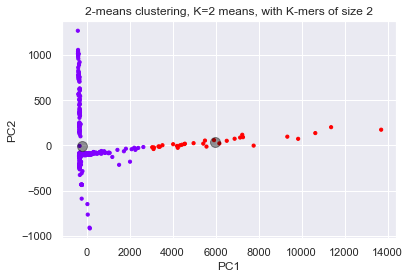

In [16]:
plot_kmeans(X_reduced_all2, y_pred2, centers2,2)

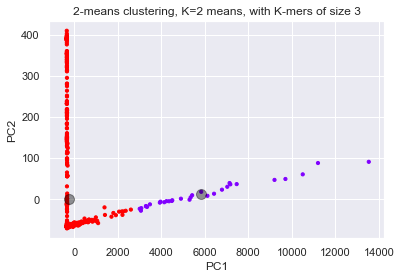

In [17]:
plot_kmeans(X_reduced_all3, y_pred3, centers3,3)

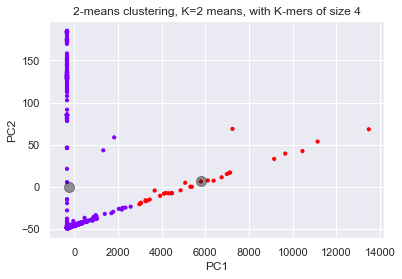

In [18]:
plot_kmeans(X_reduced_all4, y_pred4, centers4,4)

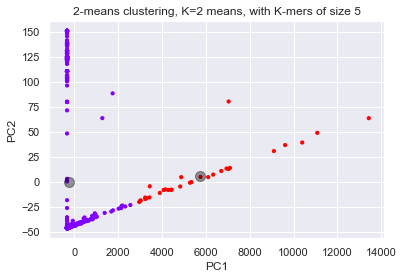

In [19]:
plot_kmeans(X_reduced_all5, y_pred5, centers5,5)

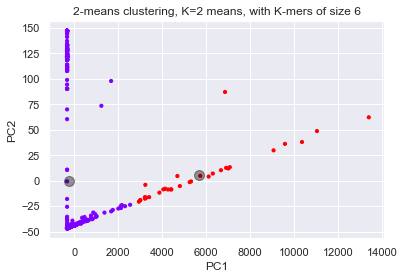

In [20]:
plot_kmeans(X_reduced_all6, y_pred6, centers6,6)

In [6]:
from sklearn.cluster import SpectralClustering

def spectral_clust(num_clusters,X_reduced,k):
    model = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors',
                            assign_labels='kmeans')
    labels = model.fit_predict(X_reduced)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels,
                s=10, cmap='Accent')
    plt.title(f'Spectral clustering, 2 clusters, with K-mers of size {k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


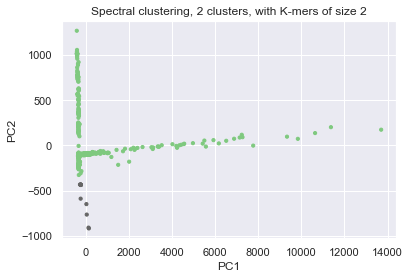

In [22]:
spectral_clust(2,X_reduced_all2,2)

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


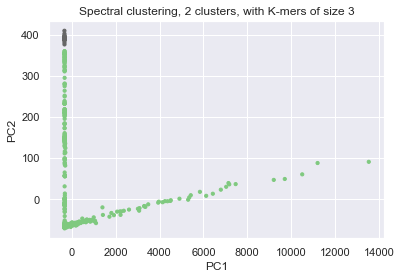

In [23]:
spectral_clust(2,X_reduced_all3,3)

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


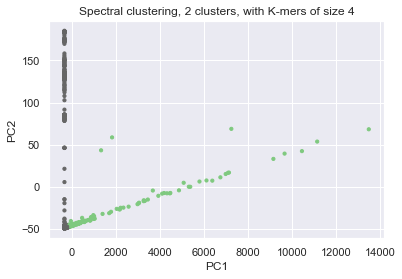

In [24]:
spectral_clust(2,X_reduced_all4,4)

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


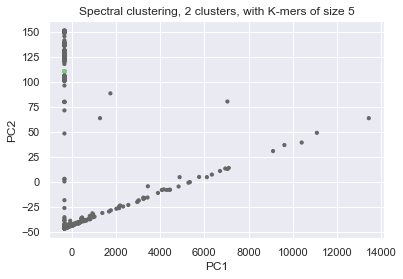

In [25]:
spectral_clust(2,X_reduced_all5,5)

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


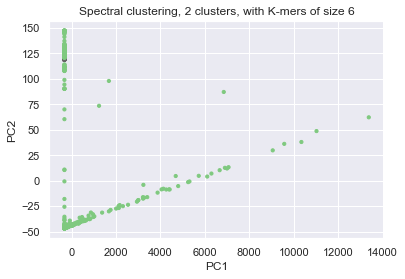

In [26]:
spectral_clust(2,X_reduced_all6,6)

In [27]:
np.unique(new_metadata['region'])

array(['Africa', 'Asia', 'Central America', 'Europe', 'North America',
       'Oceania', 'South America'], dtype=object)

In [7]:
#part 2: Classification by geography

    
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

def corona_classifier(sequences,k,classes):

    corona_df = sequences
    corona_df['kmers'] = get_kmers_df(corona_df,k)
    corona_kmer_counts = get_kmer_counts(corona_df, k)
    corona_df


    # part 2
    X = corona_kmer_counts.toarray()
    y = classes

     #.astype('category').cat.codes
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20)

    clf = MultinomialNB()
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    
    #plotting confusion matrix for this classifier:
# https://stackoverflow.com/questions/55247669/how-to-plot-confusion-matrices-of-different-types-in-python-with-minimal-code
    
    # Creates a confusion matrix 
    cm = confusion_matrix(y_test, y_pred) 

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True, cbar= True, cmap = 'rainbow')
    plt.title(f'Multinomial Naive Bayes ({k}-mers)')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return y_test,y_pred,clf


In [8]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [142]:
#generating classification results for k-mers of size 2,3,4,5,and 6.
class_labels = np.unique(new_metadata['region'])
class_labels

array(['Africa', 'Asia', 'Central America', 'Europe', 'North America',
       'Oceania', 'South America'], dtype=object)

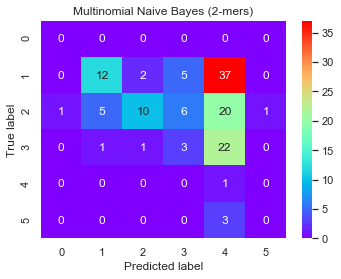

2-mers:
 Accuracy = 0.200 
precision = 0.586 
recall = 0.200 
f1 = 0.288


/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
y_test2, y_pred2,clf2 = corona_classifier(new_seq,2, new_metadata['region']) # classes = location of exposure. host not terribly useful since tester obviously can know host. what is more hidden is locaiton of exposure.)
print('2-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test2, y_pred2)))

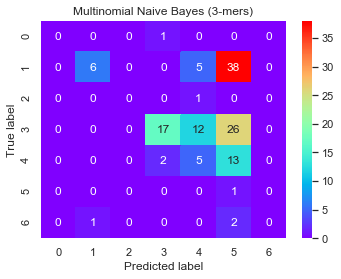

3-mers:
 Accuracy = 0.223 
precision = 0.716 
recall = 0.223 
f1 = 0.309


/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
y_test3, y_pred3,clf3 = corona_classifier(new_seq,3, new_metadata['region']))
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test3, y_pred3)))

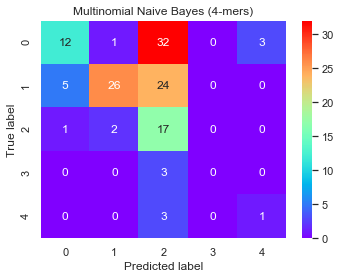

4-mers:
 Accuracy = 0.431 
precision = 0.666 
recall = 0.431 
f1 = 0.457


/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
y_test4, y_pred4,clf4 = corona_classifier(new_seq,4, new_metadata['region']))
print('4-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test4, y_pred4)))

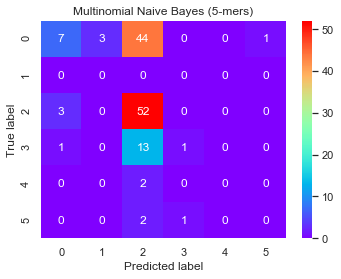

5-mers:
 Accuracy = 0.462 
precision = 0.522 
recall = 0.462 
f1 = 0.365


/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
y_test5, y_pred5,clf5 = corona_classifier(new_seq,5, new_metadata['region']))
print('5-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test5, y_pred5)))

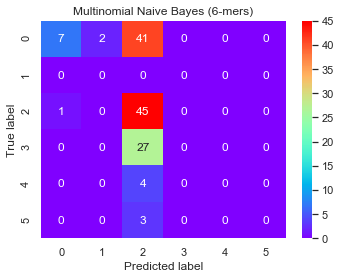

6-mers:
 Accuracy = 0.400 
precision = 0.469 
recall = 0.400 
f1 = 0.285


In [16]:
y_test6, y_pred6,clf6 = corona_classifier(new_seq,6, new_metadata['region'])
print('6-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test6, y_pred6)))

'Africa', 'Asia', 'Central America', 'Europe', 'North America',
       'Oceania', 'South America'

Now, using thousands of coronaviridae in place of more covid-19 due to lack of data
SARS-CoV-2, taxid:2697049,  Coronaviridae, taxid:11118

In [10]:
import phylopandas as ph
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# new_seq = ph.read_fasta('data/GISAID/newfile.fasta') #original dataset covid-19
bulk_seq = ph.read_fasta('bulk_data/bulk_sequences.fasta') #coronaviriae data (3182 sequences)
# https://www.ncbi.nlm.nih.gov/labs/virus
# bulk_seq = bulk_seq.drop(['description','label','uid'])

bulk_info = pd.read_csv('bulk_data/bulk_sequences.csv')

In [11]:
bulk_seq.head()

,id,sequence,description,label,uid
0,NC_045512,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,NC_045512 |Severe acute respiratory syndrome c...,NC_045512,gx1yUcabT7
1,NC_006213,ATTGTGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTG...,NC_006213 |Human coronavirus OC43 strain ATCC ...,NC_006213,wzE26djbxm
2,NC_011547,GACAAAGCTCAAAATCAATACGTTATACGTATTGTATTTTGTAGCC...,NC_011547 |Bulbul coronavirus HKU11-934| compl...,NC_011547,69ZhAJ4CoZ
3,NC_038294,ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGC...,NC_038294 |Betacoronavirus England 1| complete...,NC_038294,eC3v7dHKvc
4,NC_038861,ACTTTTAAAGTAAAGTGAGTGTAGCGTGGCTATATCTCTTCTTTTA...,NC_038861 |Transmissible gastroenteritis virus...,NC_038861,LW5WSYZaqx


In [12]:
bulk_info.head()

,Accession,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,29903,China,Homo sapiens,NaN,2019-12
1,NC_006213,2019-02-21T00:00:00Z,Betacoronavirus 1,30741,USA,NaN,NaN,NaN
2,NC_011547,2018-08-24T00:00:00Z,Bulbul coronavirus HKU11,26487,Hong Kong,Pycnonotus jocosus,NaN,2007-01
3,NC_038294,2018-08-24T00:00:00Z,Middle East respiratory syndrome-related coron...,30111,United Kingdom,Homo sapiens,NaN,2012-09-11
4,NC_038861,2018-08-24T00:00:00Z,Alphacoronavirus 1,28586,USA,Sus scrofa,NaN,NaN


In [13]:
data = bulk_seq.drop(columns = ['description', 'label','uid'])
data['country'] = bulk_info['Geo_Location']
data = data.dropna() #removing some unknown origins
data

,id,sequence,country
0,NC_045512,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,China
1,NC_006213,ATTGTGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTG...,USA
2,NC_011547,GACAAAGCTCAAAATCAATACGTTATACGTATTGTATTTTGTAGCC...,Hong Kong
3,NC_038294,ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGC...,United Kingdom
4,NC_038861,ACTTTTAAAGTAAAGTGAGTGTAGCGTGGCTATATCTCTTCTTTTA...,USA
...,...,...,...
3163,AY283798,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...,Singapore
3164,AY283794,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...,Singapore
3165,AY283797,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...,Singapore
3174,AY278554,CTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTC...,China


In [14]:
geog_df = pd.read_csv('countries.csv')
# data credit: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
geog_df

,name,sub-region,intermediate-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
243,Wallis and Futuna,Oceania,Polynesia
244,Western Sahara,Africa,Northern Africa
245,Yemen,Asia,Western Asia
246,Zambia,Africa,Sub-Saharan Africa


In [15]:
def country_to_intregion(geog_df,country_name):
    return geog_df['intermediate-region'][geog_df['name'] == country_name].to_string().lstrip('0123456789').strip()

def country_to_subregion(geog_df,country_name):
    return geog_df['sub-region'][geog_df['name'] == country_name].to_string().lstrip('0123456789').strip()

# reducing class number from countries to regions (17 from 59), and to continental regions.
data['int_region'] = [country_to_intregion(geog_df, i) for i in data['country']]
data['sub_region'] = [country_to_subregion(geog_df, i) for i in data['country']]

data

,id,sequence,country,int_region,sub_region
0,NC_045512,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,China,Eastern Asia,Asia
1,NC_006213,ATTGTGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTG...,USA,Northern America,Americas
2,NC_011547,GACAAAGCTCAAAATCAATACGTTATACGTATTGTATTTTGTAGCC...,Hong Kong,Eastern Asia,Asia
3,NC_038294,ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGC...,United Kingdom,Northern Europe,Europe
4,NC_038861,ACTTTTAAAGTAAAGTGAGTGTAGCGTGGCTATATCTCTTCTTTTA...,USA,Northern America,Americas
...,...,...,...,...,...
3163,AY283798,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...,Singapore,South-eastern Asia,Asia
3164,AY283794,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...,Singapore,South-eastern Asia,Asia
3165,AY283797,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...,Singapore,South-eastern Asia,Asia
3174,AY278554,CTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTC...,China,Eastern Asia,Asia


preliminary analysis: Clustering all sequences

In [155]:
#clustering across k-mer sizes

# K-mer size of 2,3,4,5,6:
clust_df2, X_reduced_all2 = clust_preparation(data,2)
clust_df3, X_reduced_all3 = clust_preparation(data,3)
clust_df4, X_reduced_all4 = clust_preparation(data,4)
clust_df5, X_reduced_all5 = clust_preparation(data,5)
clust_df6, X_reduced_all6 = clust_preparation(data,6)

y_pred2, centers2 = k_means_cluster(X_reduced_all2)
y_pred3, centers3 = k_means_cluster(X_reduced_all3)
y_pred4, centers4 = k_means_cluster(X_reduced_all4)
y_pred5, centers5 = k_means_cluster(X_reduced_all5)
y_pred6, centers6 = k_means_cluster(X_reduced_all6)


In [ ]:
plot_kmeans(X_reduced_all2, y_pred2, centers2,2)

In [ ]:
plot_kmeans(X_reduced_all3, y_pred3, centers3,3)

In [ ]:
plot_kmeans(X_reduced_all4, y_pred4, centers4,4)

In [ ]:
plot_kmeans(X_reduced_all5, y_pred5, centers5,5)

In [ ]:
plot_kmeans(X_reduced_all6, y_pred6, centers6,6)

In [ ]:
# SPECTRAL CLUSTERING

spectral_clust(2,X_reduced_all2,2)


In [ ]:
spectral_clust(3,X_reduced_all3,3)

In [ ]:
spectral_clust(4,X_reduced_all4,4)

In [ ]:
spectral_clust(5,X_reduced_all5,5)

In [ ]:
spectral_clust(6,X_reduced_all6,6)

In [35]:
##classification
unique_labels = np.unique(data['int_region'])
unique_labels

array(['Australia and New Zealand', 'Eastern Asia', 'Eastern Europe',
       'Latin America and the Caribbean', 'Northern Africa',
       'Northern America', 'Northern Europe', 'South-eastern Asia',
       'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa',
       'Western Asia', 'Western Europe'], dtype=object)

In [16]:
X = pd.DataFrame(data['sequence'].astype(str))
X

,sequence
0,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
1,ATTGTGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTG...
2,GACAAAGCTCAAAATCAATACGTTATACGTATTGTATTTTGTAGCC...
3,ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGC...
4,ACTTTTAAAGTAAAGTGAGTGTAGCGTGGCTATATCTCTTCTTTTA...
...,...
3163,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...
3164,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...
3165,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...
3174,CTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTC...


In [17]:
y = pd.DataFrame(data['int_region'])
y

,int_region
0,Eastern Asia
1,Northern America
2,Eastern Asia
3,Northern Europe
4,Northern America
...,...
3163,South-eastern Asia
3164,South-eastern Asia
3165,South-eastern Asia
3174,Eastern Asia


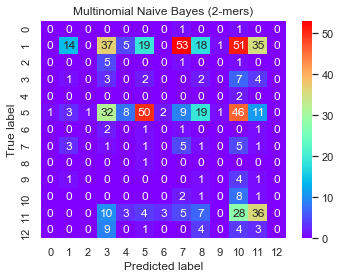

2-mers:
 Accuracy = 0.192 
precision = 0.502 
recall = 0.192 
f1 = 0.225


In [20]:
y_test2, y_pred2,clf2 = corona_classifier(X,2, y) # classes = location of origin
print('2-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test2, y_pred2)))

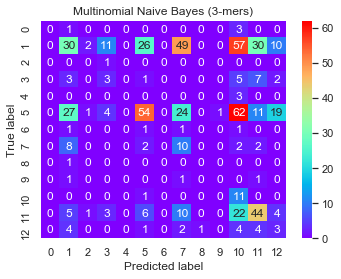

3-mers:
 Accuracy = 0.256 
precision = 0.411 
recall = 0.256 
f1 = 0.283


In [18]:
y_test3, y_pred3,clf3 = corona_classifier(X,3, y)
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test3, y_pred3)))

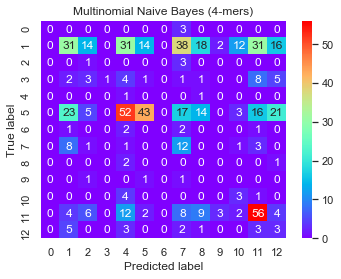

3-mers:
 Accuracy = 0.250 
precision = 0.505 
recall = 0.250 
f1 = 0.289


In [19]:
y_test4, y_pred4,clf4 = corona_classifier(X,4, y)
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test4, y_pred4)))

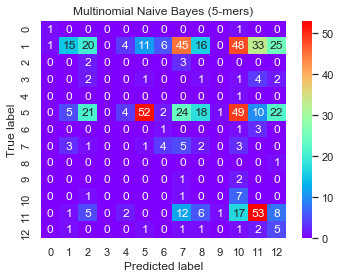

3-mers:
 Accuracy = 0.233 
precision = 0.587 
recall = 0.233 
f1 = 0.273


In [20]:
y_test5, y_pred5,clf5 = corona_classifier(X,5, y)
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test5, y_pred5)))

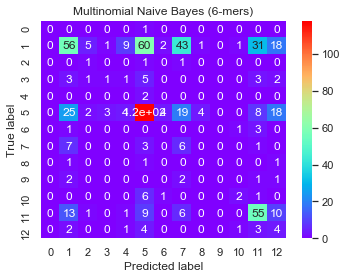

3-mers:
 Accuracy = 0.402 
precision = 0.479 
recall = 0.402 
f1 = 0.417


In [21]:
y_test6, y_pred6,clf6 = corona_classifier(X,6, y)
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test6, y_pred6)))

In [34]:
# now, trying continents (fewer classes)
y = pd.DataFrame(data['sub_region'])
y

,sub_region
0,Asia
1,Americas
2,Asia
3,Europe
4,Americas
...,...
3163,Asia
3164,Asia
3165,Asia
3174,Asia


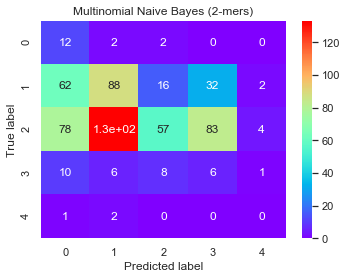

2-mers:
 Accuracy = 0.269 
precision = 0.533 
recall = 0.269 
f1 = 0.295


In [23]:
y_test2, y_pred2,clf2 = corona_classifier(X,2, y) # classes = location of origin
print('2-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test2, y_pred2)))

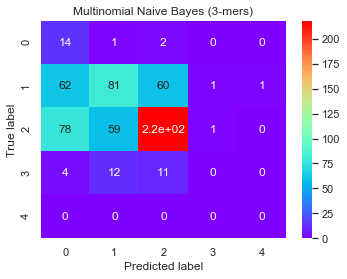

3-mers:
 Accuracy = 0.517 
precision = 0.623 
recall = 0.517 
f1 = 0.554


In [24]:
y_test3, y_pred3,clf3 = corona_classifier(X,3, y)
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test3, y_pred3)))

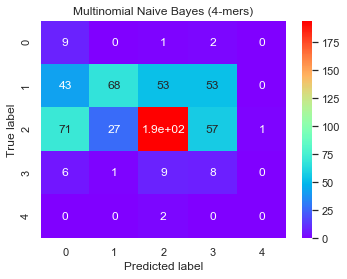

3-mers:
 Accuracy = 0.461 
precision = 0.691 
recall = 0.461 
f1 = 0.531


In [25]:
y_test4, y_pred4,clf4 = corona_classifier(X,4, y)
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test4, y_pred4)))

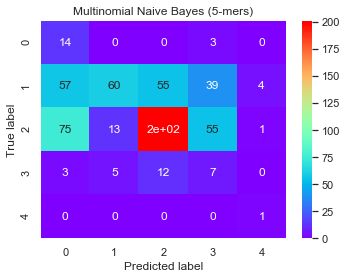

3-mers:
 Accuracy = 0.468 
precision = 0.707 
recall = 0.468 
f1 = 0.529


In [26]:
y_test5, y_pred5,clf5 = corona_classifier(X,5, y)
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test5, y_pred5)))

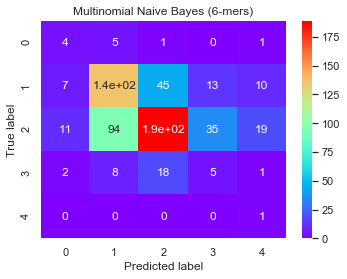

3-mers:
 Accuracy = 0.554 
precision = 0.633 
recall = 0.554 
f1 = 0.581


In [27]:
y_test6, y_pred6,clf6 = corona_classifier(X,6, y)
print('3-mers:\n Accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (get_metrics(y_test6, y_pred6)))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a609a4850>],
      dtype=object)

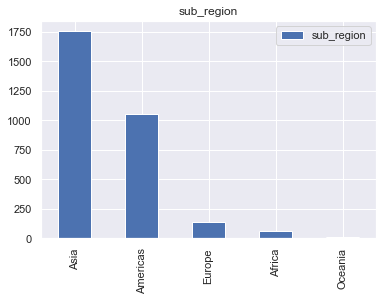

In [36]:
#an explanation: class-imbalance. still: americas versus asia shows some difference in 6mers.

y.apply(pd.value_counts).plot(kind='bar', subplots=True)

In [42]:
#Label correspondence:
dict(zip(range(0,5),np.unique(y)))

{0: 'Africa', 1: 'Americas', 2: 'Asia', 3: 'Europe', 4: 'Oceania'}